### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [8]:
data = pd.read_csv('data/coupons.csv')

In [9]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
data = data.drop('car', axis = 1)


4. What proportion of the total observations chose to accept the coupon?



In [43]:
accept = data.loc[data['Y'] == 1].shape[0] 
total = data.shape[0]
print(accept)
print(total)
# calculate the ratio by deviding the accepted row count by the total row count
accept_rate = accept /total 
print(accept_rate)

print(data['Y'].mean()) # using mean() to calculate the rate directly

7210
12684
0.5684326710816777
0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


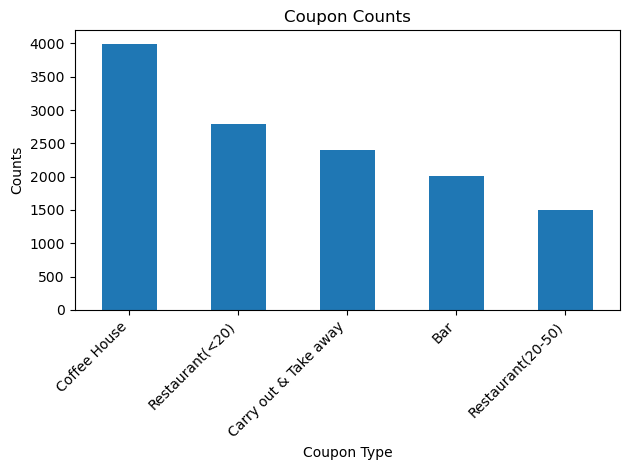

In [23]:
coupon_count = data["coupon"].value_counts()
print(coupon_count)

coupon_count.plot(kind='bar')
plt.title('Coupon Counts')
plt.xlabel('Coupon Type')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout() # Improves layout
plt.show()


6. Use a histogram to visualize the temperature column.

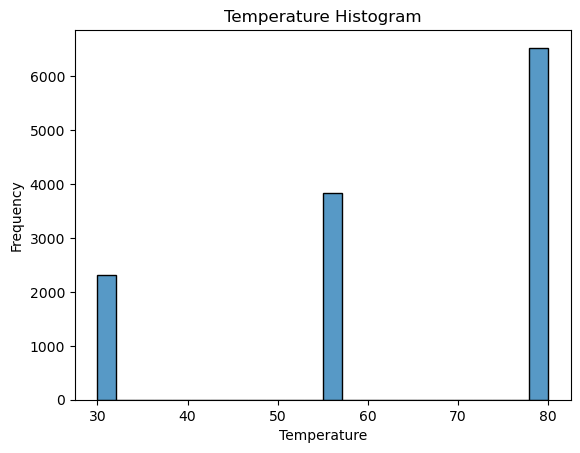

In [32]:
sns.histplot(data['temperature']) 
plt.title('Temperature Histogram')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [41]:
df_bar = data.query('coupon == "Bar"')
# df_bar.shape
df_bar.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [42]:
bar_accept_rate = df_bar['Y'].mean()
print(bar_accept_rate)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [59]:
df_bar['Bar'].value_counts()
# create filtering masks
less_or_equal_3 = (df_bar['Bar'] == 'never') | (df_bar['Bar'] == 'less1') | (df_bar['Bar'] == '1~3')
more_than_3 = (df_bar['Bar'] == '4~8') | (df_bar['Bar'] == 'gt8')

accept_rate_less_than_3 = df_bar.loc[less_or_equal_3, 'Y'].mean()
accept_rate_more_than_3 = df_bar.loc[more_than_3, 'Y'].mean()

print(accept_rate_less_than_3)
print(accept_rate_more_than_3)



0.37061769616026713
0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [68]:
# df_bar['age'].value_counts()
# df_bar.info()
# create filtering masks
# df_bar['age'] = df_bar['age'].astype('int64')
more_than_1 = (df_bar['Bar'] == '1~3') | (df_bar['Bar'] == '4~8') | (df_bar['Bar'] == 'gt8')
age_less_than_25 = (df_bar['age'] == '21') | (df_bar['age'] == 'below21')
mask = more_than_1 & ~age_less_than_25

accept_rate_over_25_n_go_to_bar = df_bar.loc[mask, 'Y'].mean()
accept_rate_other = df_bar.loc[~mask, 'Y'].mean()

print(accept_rate_over_25_n_go_to_bar)
print(accept_rate_other)

0.6952380952380952
0.33500313087038197


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [75]:
# df_bar['passanger'].value_counts()
# df_bar['occupation'].value_counts()

with_kids_passanger = df_bar['passanger'] == 'Kid(s)'
occupation_farming_fishing_forestry = df_bar['occupation'] == 'Farming Fishing & Forestry'

combined_mask = more_than_1 & ~with_kids_passanger & ~occupation_farming_fishing_forestry

accept_rate_with_combined_mask = df_bar.loc[combined_mask, 'Y'].mean()
accept_rate_otherwise = df_bar.loc[~combined_mask, 'Y'].mean()

print(accept_rate_with_combined_mask)
print(accept_rate_otherwise)



0.7132486388384754
0.296043656207367


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [84]:
# df_bar['income'].value_counts()
# df_bar.info()

is_widowed = df_bar['maritalStatus'] == 'Widowed'
age_less_than_30 = (df_bar['age'] == '21') | (df_bar['age'] == 'below21') | (df_bar['age'] == '26')
cheap_restaurant_more_than_4 = (df_bar['RestaurantLessThan20'] == '4~8') | (df_bar['RestaurantLessThan20'] == 'gt8 ') 
income_less_than_50k = (df_bar['income'] == "Less than $12500") | (df_bar['income'] == "$12500 - $24999") | (df_bar['income'] == "$25000 - $37499") | (df_bar['income'] == "$37500 - $49999") 

mask_1 = more_than_1 & ~with_kids_passanger & ~is_widowed
mask_2 = more_than_1 & age_less_than_30
mask_3 = cheap_restaurant_more_than_4 & income_less_than_50k

accept_rate_with_mask_1 = df_bar.loc[mask_1, 'Y'].mean()
accept_rate_with_mask_2 = df_bar.loc[mask_2, 'Y'].mean()
accept_rate_with_mask_3 = df_bar.loc[mask_3, 'Y'].mean()

print(accept_rate_with_mask_1)
print(accept_rate_with_mask_2)
print(accept_rate_with_mask_3)


0.7132486388384754
0.7217391304347827
0.39919354838709675


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
'''
My conclusion on drivers who has higher chances of taking Bar coupons are:
drivers who go to bar more frequently
drivers who have passengers other than kids
drivers whose income is relative higher
'''

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create a new `DataFrame`, `df_coffee` that contains just the `Coffee House` coupons.

In [94]:

df_coffee = data.query('coupon == "Coffee House"')
df_coffee.head(10)
df_coffee.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3959 non-null   object
 15  CoffeeHouse           3924 non-null   obje

2. Quickly take a look at some of the acceptance rate for each value type for some of the columns. 

destination
No Urgent Place    0.580974
Work               0.445783
Home               0.362069
Name: Y, dtype: float64
passanger
Friend(s)    0.596906
Partner      0.570492
Kid(s)       0.483092
Alone        0.437943
Name: Y, dtype: float64
CoffeeHouse
4~8      0.685874
gt8      0.657895
1~3      0.647793
less1    0.481860
never    0.188781
Name: Y, dtype: float64
occupation
Healthcare Practitioners & Technical         0.743243
Building & Grounds Cleaning & Maintenance    0.727273
Student                                      0.625251
Transportation & Material Moving             0.618421
Healthcare Support                           0.615385
Installation Maintenance & Repair            0.568182
Architecture & Engineering                   0.555556
Farming Fishing & Forestry                   0.545455
Unemployed                                   0.542105
Arts Design Entertainment Sports & Media     0.507177
Computer & Mathematical                      0.503341
Personal Care & Service    

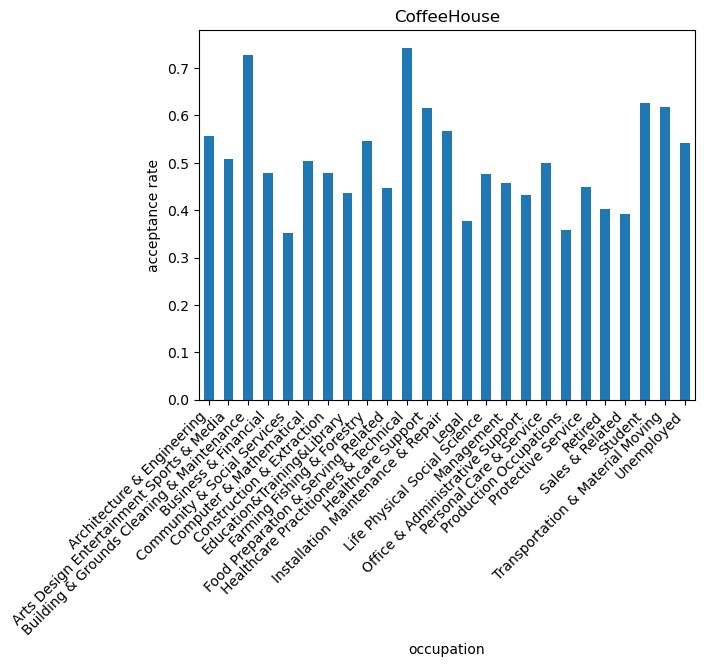

In [122]:
# df_coffee['destination'].value_counts()
# print(df_coffee.groupby('destination')['Y'].mean().sort_values(ascending=False))
# print(df_coffee.groupby('passanger')['Y'].mean().sort_values(ascending=False))
# print(df_coffee.groupby('CoffeeHouse')['Y'].mean().sort_values(ascending=False))
# print(df_coffee.groupby('occupation')['Y'].mean().sort_values(ascending=False))

for col in ('destination', 'passanger', 'CoffeeHouse', 'occupation'):
    sub_df = df_coffee.groupby(col)['Y'].mean()
    sub_df.plot(kind='bar')
    plt.title('Acceptance rate based on ' + col)
    plt.xlabel(col)
    plt.ylabel('acceptance rate')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
    plt.show()

3. Create masks and get acceptance rate for drivers who goes to coffee house more than once every month and occupation is either in `Healthcare` or is `building` related

In [113]:
# create boolean masks
go_to_coffee_more_than_1 = (df_coffee['CoffeeHouse'] == '1~3') | (df_coffee['CoffeeHouse'] == '4~8') | (df_coffee['CoffeeHouse'] == 'gt8')
occupation_building_or_Healthcare = (df_coffee['occupation'] == 'Healthcare Practitioners & Technical') | (df_coffee['occupation'] == 'Healthcare Practitioners & Technical')

mask_1 = go_to_coffee_more_than_1 & occupation_building_or_Healthcare

rate_1 = df_coffee.loc[mask_1, 'Y'].mean()
rate_2 = df_coffee.loc[~mask_1, 'Y'].mean()

print(rate_1)
print(rate_2)



0.9
0.4941713127217435


4. Silimarly, create more masks and get acceptance rate for differen combination of the filters.

In [107]:
no_urgent = df_coffee['destination'] == 'No Urgent Place'

accept_rate_with_no_urgent = df_coffee.loc[no_urgent, 'Y'].mean()
accept_rate_home_or_work = df_coffee.loc[~no_urgent, 'Y'].mean()

print(accept_rate_with_no_urgent)
print(accept_rate_home_or_work)

mask2 = mask_1 & no_urgent

accept_rate_mask_2 = df_coffee.loc[mask2, 'Y'].mean()
print(accept_rate_mask_2)



0.5809744779582366
0.4035850081477458
1.0


5. Come out with some conclusions. 

In [ ]:
'''
My conclusion on drivers who has higher chances of taking coffee house coupons are:
drivers who go to coffee house more frequently
drivers who worked in building or health care
drivers whose destination is not an urgent place
'''